In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from tqdm import tqdm

In [4]:
def GLP(x, n, alpha): # Generalized Laguerre polynomials
    L0 = np.ones(x.shape, dtype=x.dtype)
    L1 = 1.0 + alpha - x
    
    if n == 0:
        Ln = L0
    if n == 1:
        Ln = L1
    
    for i in range(2, n+1):
        k = i - 1
        Ln = (((2*k + 1 + alpha - x))*L1 - (k + alpha)*L0)/(k+1)
        L0, L1 = L1, Ln
        
    return Ln

def Skl(r, k, l, q): # Sturmian
    return (
        np.sqrt((np.math.factorial(k) / (2 * np.math.factorial(2 * l + 1 + k))))
        * np.exp(-q * r)
        * ((2 * q * r) ** (l + 1))
        * GLP(2 * q * r, k, 2 * l + 1)
    )

def V(r):
    return -1 / r

In [5]:
def HB(N, l, q, r_min, r_max, Nr, dtype):
    print(f"H,B calculation for N={N}")
    
    x = np.linspace(np.sqrt(r_min), np.sqrt(r_max), Nr+1, dtype=dtype)
    B = np.zeros((N, N), dtype=dtype)
    H = np.zeros((N, N), dtype=dtype)
    S = np.zeros((N, Nr), dtype=dtype)
    S_diff = np.zeros((N, Nr), dtype=dtype)
    
    r1 = (x**2)
    r = r1[0:-1]
    dr = r1[1:]-r
    
    V_r = V(r)

    print("Sturmian Calculation...")
    
    
    for n in tqdm(range(N)):
        Sn = Skl(r1, n, l, q)
        S[n] = Sn[0:-1]
        S_diff[n] = (Sn[1:]-Sn[:-1])/dr
        
    print("H, B Calculation...")

    for n in tqdm(range(N)):
        for k in range(n, N):
            
            B[n, k] = (S[n] * S[k] * dr).sum()
            H[n, k] = (
                (
                    (1/2)*S_diff[n]*S_diff[k] + 
                    S[n]*S[k]*(V_r + (l)*(l+1)/(2*r**2))
                )
                * (dr)
            ).sum()
            
            if n != k:
                B[k, n] = B[n, k]
                H[k, n] = H[n, k]
            
    return H, B

In [1]:
N = 10
l = 0
q = 0.7

r_min = 10**-13
r_max = 1000
Nr = 100000

In [7]:
H, B = HB(N, l, q, r_min, r_max, Nr, np.float64)
eigenvalues, eigenvectors = sp.linalg.eigh(H, B)
eigenvalues.sort() # 15.3s

H,B calculation for N=100
Sturmian Calculation...


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 73.90it/s]


H, B Calculation...


100%|██████████| 100/100 [00:05<00:00, 19.34it/s]


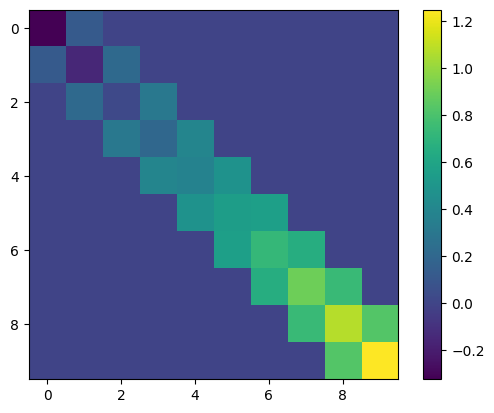

In [203]:
plt.imshow(H)
plt.colorbar()

In [221]:
eigenvalues[0]
# -0.5000875995313023 for normal
# -0.5000680492036502 for sqrt

-0.5000006783775198